# An√°lise Explorat√≥ria de dados 

## Defini√ß√£o e an√°lise do Problema

O banco quer saber, com base no uso hist√≥rico do cart√£o, qual √© o risco de default que paira hoje sobre toda a carteira. Em outras palavras: quanto do limite disponibilizado j√° virou saldo devedor, que parte desse saldo est√° atrasada, quantos clientes formam cada grupo e se, √† luz desses n√∫meros, o portf√≥lio pode ser considerado saud√°vel.

M√©tricas-chave que extra√≠mos
Tamanho da carteira ‚Äì trinta mil contratos somam pouco mais de cinco bilh√µes de d√≥lares taiwaneses em limite autorizado (‚âà US$ 155 mi).

Exposi√ß√£o real ‚Äì apenas 35 % desse teto estava facturado no ciclo mais recente; ou seja, cerca de dois bilh√µes NT$ viraram saldo devedor efetivo.

Default global ‚Äì 22 % dos clientes (algo em torno de seis mil titulares) n√£o pagaram o m√≠nimo no m√™s seguinte; os restantes 78 % est√£o em dia.

Risco por faixa de limite ‚Äì entre cart√µes de at√© 50 000 NT$ o default passa de 36 %; j√° acima de 500 000 NT$ ele cai para perto de 11 %. O padr√£o decresce de forma quase linear √† medida que o limite sobe.

Ponte de cr√©dito ‚Äì da capacidade total at√© o risco mais cr√≠tico percebemos:

quase 65 % do limite continua livre,

25 % encontra-se em dia (faturado mas puntualmente pago) e

apenas 10 % repousa em buckets de atraso prolongado (31+ dias).


## |Checklist para compreender as vari√°vies analisadas|
1 Cada registro representa um titular de cart√£o com:

    informa√ß√µes cadastrais (sexo, idade, escolaridade, estado civil);

    limite de cr√©dito aprovado;

    comportamento recente (6 meses) de atraso, valores faturados e pagamentos efetuados;

    r√≥tulo bin√°rio que indica se o cliente entrou em default no m√™s subsequente.


## 2 Tipo de aprendizado
Nas distribui√ß√µes (PDF, CDF), histogramas, estat√≠sticas descritivas e curvas de concentra√ß√£o n√≥s olhamos apenas para a massa de dados dispon√≠vel, sem usar explicitamente a vari√°vel-alvo ‚Äúdefault‚Äù como etiqueta de treinamento. Estamos descrevendo o comportamento agregado e extraindo padr√µes, n√£o ajustando um modelo para prever r√≥tulos.

Em outras palavras, trata-se de an√°lise explorat√≥ria/estat√≠stica descritiva, que √© inerentemente n√£o supervisionada: nenhuma fun√ß√£o de erro foi minimizada contra um ‚Äúgabarito‚Äù de default.

## 3 Premissas / hip√≥teses
Premissa	Racional
O comportamento financeiro dos 6 meses anteriores √© preditivo do default no pr√≥ximo m√™s. N√£o analisado no modelo.
As vari√°veis demogr√°ficas adicionam sinal, mas podem introduzir vi√©s; ser√£o monitoradas.	
A codifica√ß√£o ordinal dos atrasos (PAY_*) reflete gravidade crescente (‚àí2 ‚Üí pagou adiantado, 8 ‚Üí 8 meses de atraso).	
N√£o h√° valores faltantes; imputadores s√£o mantidos apenas para robustez em produ√ß√£o.	
A taxa hist√≥rica de default (~22 %) √© representativa do portf√≥lio futuro.	

## 4 Restri√ß√µes / condi√ß√µes na sele√ß√£o dos dados
Janela fixa : abril ‚Üí setembro / 2005 (6 observa√ß√µes mensais por vari√°vel de tempo).

Geografia : clientes de um √∫nico banco em Taiwan (poss√≠vel limita√ß√£o de generaliza√ß√£o).

Amostra balanceada apenas por disponibilidade : n√£o foi feito undersampling ou oversampling; o desbalanceamento natural (‚âà 1 : 4) ser√° tratado na modelagem.

Features preservadas conforme dataset UCI; nenhuma coluna externa agregada.

Excluiu-se a linha de cabe√ßalho que havia sido lida como dado e a coluna ID (chave sem valor preditivo).

## Dicion√°rio de atributos (descritos um a um)

LIMIT_BAL ‚Äì limite total de cr√©dito concedido ao cart√£o, expresso em New Taiwan dollars (valor cont√≠nuo).

SEX ‚Äì sexo do titular (1 = masculino, 2 = feminino).

EDUCATION ‚Äì escolaridade: 1 =p√≥s-gradua√ß√£o, 2 = gradua√ß√£o, 3 = ensino m√©dio, 4 = outros; c√≥digos 0, 5, 6 indicam informa√ß√£o ausente ou n√£o classificada.

MARRIAGE ‚Äì estado civil: 1 = casado, 2 = solteiro, 3 = outros; 0 = desconhecido.

AGE ‚Äì idade do titular em anos inteiros.

PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 ‚Äì status de pagamento em cada um dos seis meses anteriores (setembro ‚Üí abril/2005). Escala ordinal:

‚àí2 = pagou adiantado,

‚àí1 = pagou no vencimento,

0 = sem atraso,

1, 2, ‚Ä¶, 9 = atraso de 1 a 9 meses.

BILL_AMT1, BILL_AMT2, ‚Ä¶, BILL_AMT6 ‚Äì valor da fatura fechada em cada m√™s (setembro a abril/2005), em NT$.

PAY_AMT1, PAY_AMT2, ‚Ä¶, PAY_AMT6 ‚Äì quantia efetivamente paga pelo cliente em cada um desses mesmos meses, tamb√©m em NT$.

default_payment_next_month ‚Äì vari√°vel-alvo bin√°ria: 1 indica que o cliente entrou em default (n√£o pagou o valor m√≠nimo) no m√™s seguinte ao per√≠odo observado; 0 indica pagamento normal.

## Descri√ß√£o Detalhada do Dicion√°rio:

Limite de cr√©dito
LIMIT_BAL
√â o teto que o banco concedeu. Funciona como ‚Äúcombust√≠vel‚Äù para o risco: quanto maior, maior a perda potencial se o cliente vier a inadimplir. Na nossa carteira ele se concentra at√© 200 000 NT$, ent√£o a maior parte do risco est√° pulverizada em tickets pequenos.

Comportamento recente (melhor term√¥metro de risco)
PAY_0 ‚Ä¶ PAY_6
Status de atraso m√™s a m√™s, onde ‚àí2/‚àí1 significam adiantado ou pontual, e 1, 2, 3‚Ä¶ indicam quantos meses de atraso. S√£o os sinais de alerta mais fortes: qualquer valor ‚â• 1 eleva a probabilidade de default; valores ‚â• 3 sugerem est√°gio cr√≠tico.

BILL_AMT1 ‚Ä¶ BILL_AMT6
Saldo faturado no fim de cada m√™s. Mostram o tamanho efetivo da exposi√ß√£o (d√≠vida real, n√£o apenas o limite). Uma fatura sempre pr√≥xima do limite indica alta utiliza√ß√£o ‚Äì potencial sinal de tens√£o financeira.

PAY_AMT1 ‚Ä¶ PAY_AMT6
Pagamentos efetuados. Se sistematicamente menores que o faturado, revelam que o cliente gira saldo e acumula juros; tend√™ncia de subpagamento cr√¥nico aumenta risco.

Demografia (car√°ter explicativo, mas sens√≠vel a vi√©s)
SEX, EDUCATION, MARRIAGE, AGE

O sexo raramente influencia risco de forma econ√¥mica; usar exige teste de fairness.

Escolaridade e estado civil √†s vezes correlacionam com estabilidade de renda, mas tamb√©m carregam vi√©s potencial.

Idade: riscos costumam ser mais altos nos extremos (muito jovens ‚Äì pouca hist√≥ria de cr√©dito ‚Äì ou muito velhos).

## Essas vari√°veis ajudam no modelo, mas devem ser monitoradas para n√£o criar discrimina√ß√£o injustificada.

Por que cada grupo importa no risco da carteira?
Limite ‚Äì dimensiona a perda m√°xima.

Comportamento ‚Äì indica a propens√£o real de n√£o pagar; √© onde os alertas aparecem primeiro.

Demografia ‚Äì adiciona nuance ou vi√©s; bom para completar o modelo, mas sob vigil√¢ncia de compliance.

Alvo ‚Äì sem ele n√£o sabemos o que √© ‚Äúrisco‚Äù no hist√≥rico; √© o sinal usado para calibrar a r√©gua de decis√£o.

## In√≠cio da An√°lise Descritiva:
Etapa 1: Coleta e Limpeza de dados 

In [24]:
# 1. Carregar dataset e vis√£o geral
import pandas as pd

df = pd.read_csv('default of credit card clients.csv', sep=';')

print('Linhas (inst√¢ncias):', df.shape[0])
print('Colunas (atributos):', df.shape[1])
df.dtypes


Linhas (inst√¢ncias): 30000
Colunas (atributos): 25


ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

Esse trecho mostra que temos 30 000 linhas e 25 colunas. Todos os atributos v√™m como int64 ou float64 (num√©ricos) ‚Äî exceto o alvo ‚Äúdefault payment next month‚Äù, que tamb√©m √© num√©rico bin√°rio. Portanto, n√£o h√° strings nem datas para converter.

In [25]:
# 2. Espiar as primeiras linhas
df.head()


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

As primeiras cinco linhas confirmam que a linha-cabe√ßalho extra foi removida: n√£o aparece ‚ÄúX1‚Äù etc. Vemos valores negativos em PAY_0, PAY_2‚Ä¶ indicando a codifica√ß√£o (‚àí2 = pagamento antecipado, ‚àí1 = no vencimento). Nada estranho al√©m disso.

In [26]:
# 3. Verificar valores ausentes ou discrepantes
print(df.isna().sum().sum(), 'valores ausentes no total')
print('Menor valor em PAY_0:', df['PAY_0'].min(),
      '| Maior valor em PAY_0:', df['PAY_0'].max())


0 valores ausentes no total
Menor valor em PAY_0: -2 | Maior valor em PAY_0: 8


O resultado exibe zero valores ausentes em todo o conjunto. Nos atrasos, os limites variam de ‚àí2 a 8 meses, exatamente como descrito pelo dicion√°rio de dados: sem inconsist√™ncias.

## An√°lise Estat√≠stica Descritiva
Etapa 2: Estat√≠sticas da Carteira sobre Oferta e Demanda de cr√©dito.

In [27]:
# 4. Resumo estat√≠stico dos atributos num√©ricos
desc = df.describe().T
desc['median'] = df.median()
desc['moda']    = df.mode().iloc[0]
desc['missing'] = df.isna().sum()
desc[['min', 'max', 'median', 'moda', 'mean', 'std', 'missing']]


min        max    median     moda  \
ID                               1.0    30000.0   15000.5      1.0   
LIMIT_BAL                    10000.0  1000000.0  140000.0  50000.0   
SEX                              1.0        2.0       2.0      2.0   
EDUCATION                        0.0        6.0       2.0      2.0   
MARRIAGE                         0.0        3.0       2.0      2.0   
AGE                             21.0       79.0      34.0     29.0   
PAY_0                           -2.0        8.0       0.0      0.0   
PAY_2                           -2.0        8.0       0.0      0.0   
PAY_3                           -2.0        8.0       0.0      0.0   
PAY_4                           -2.0        8.0       0.0      0.0   
PAY_5                           -2.0        8.0       0.0      0.0   
PAY_6                           -2.0        8.0       0.0      0.0   
BILL_AMT1                  -165580.0   964511.0   22381.5      0.0   
BILL_AMT2                   -69777.0   983931.0   21200.0      0.0   
BILL_AMT3                  -157264.0  1664089.0   20088.5      0.0   
BILL_AMT4                  -170000.0   891586.0   19052.0      0.0   
BILL_AMT5                   -81334.0   927171.0   18104.5      0.0   
BILL_AMT6                  -339603.0   961664.0   17071.0      0.0   
PAY_AMT1                         0.0   873552.0    2100.0      0.0   
PAY_AMT2                         0.0  1684259.0    2009.0      0.0   
PAY_AMT3                         0.0   896040.0    1800.0      0.0   
PAY_AMT4                         0.0   621000.0    1500.0      0.0   
PAY_AMT5                         0.0   426529.0    1500.0      0.0   
PAY_AMT6                         0.0   528666.0    1500.0      0.0   
default payment next month       0.0        1.0       0.0      0.0   

                                     mean            std  missing  
ID                           15000.500000    8660.398374        0  
LIMIT_BAL                   167484.322667  129747.661567        0  
SEX                              1.603733       0.489129        0  
EDUCATION                        1.853133       0.790349        0  
MARRIAGE                         1.551867       0.521970        0  
AGE                             35.485500       9.217904        0  
PAY_0                           -0.016700       1.123802        0  
PAY_2                           -0.133767       1.197186        0  
PAY_3                           -0.166200       1.196868        0  
PAY_4                           -0.220667       1.169139        0  
PAY_5                           -0.266200       1.133187        0  
PAY_6                           -0.291100       1.149988        0  
BILL_AMT1                    51223.330900   73635.860576        0  
BILL_AMT2                    49179.075167   71173.768783        0  
BILL_AMT3                    47013.154800   69349.387427        0  
BILL_AMT4                    43262.948967   64332.856134        0  
BILL_AMT5                    40311.400967   60797.155770        0  
BILL_AMT6                    38871.760400   59554.107537        0  
PAY_AMT1                      5663.580500   16563.280354        0  
PAY_AMT2                      5921.163500   23040.870402        0  
PAY_AMT3                      5225.681500   17606.961470        0  
PAY_AMT4                      4826.076867   15666.159744        0  
PAY_AMT5                      4799.387633   15278.305679        0  
PAY_AMT6                      5215.502567   17777.465775        0  
default payment next month       0.221200       0.415062        0

 Os montantes (LIMIT_BAL, BILL_AMT*, PAY_AMT*) t√™m m√°ximos bem maiores que as medianas, mostrando cauda longa.
- AGE √© simetricamente distribu√≠do entre 21 e 79 anos.
- Desvios-padr√£o altos nas colunas de valores monet√°rios refor√ßam a ideia de log-transformar esses campos antes de modelar.
- Nenhum valor ausente foi contabilizado.



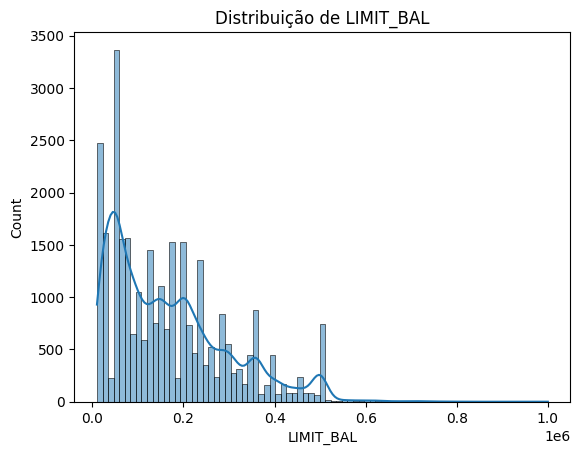

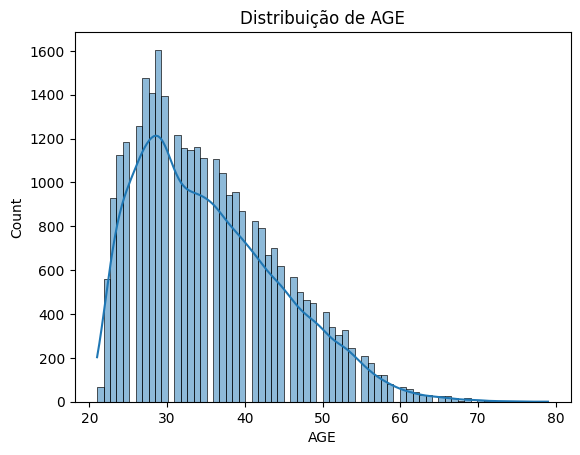

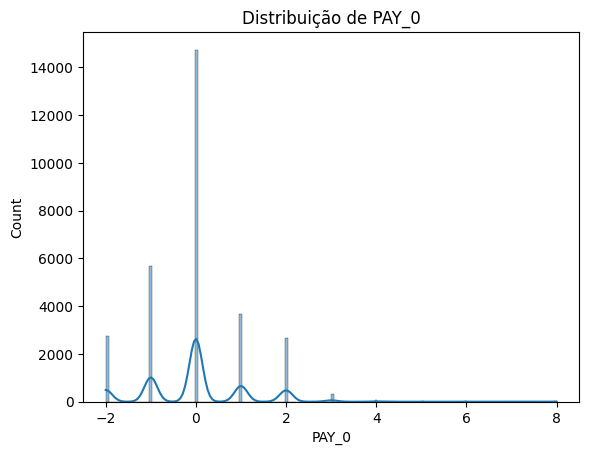

In [45]:
# 5. Distribui√ß√µes univariadas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for col in ['LIMIT_BAL', 'AGE'] + [c for c in df if c.startswith('PAY_0')][:6]:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribui√ß√£o de {col}')
    plt.show()


Os histogramas acima disponibilizam dados amplos sobre a Oferta de Cr√©dito (Limite de Cr√©dito para cada cliente), a idade dos Clientes pressentes da carteira, e a distribui√ß√£o da quantidade de opra√ß√µes com pagamentos em atraso ou n√£o.

Oferta de Cr√©dito = Distribuida de forma massificada em torno das faixas de NT$0 e NT$ 200.000.

Idade dos clientes = Em torno de 25 a 30 anos em m√©dia.

Inadimpl√™ncia = A maior parte dos clientes se encontram adimplentes. Na curva de pagamentos atrasados, a m√©dia se distribui entre 1 a 2 meses, e ~ 4000 clientes com pagamentos atrasados. 

In [29]:
# 6. Frequ√™ncia da classe-alvo
df['default payment next month'].value_counts(normalize=True)


default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

A classe ‚Äúdefault‚Äù responde por ~22 % das observa√ß√µes ‚Äî logo, o conjunto √© desbalanceado. Futuramente ser√° prudente usar class_weight='balanced' ou t√©cnicas como SMOTE para melhorar recall dos inadimplentes.

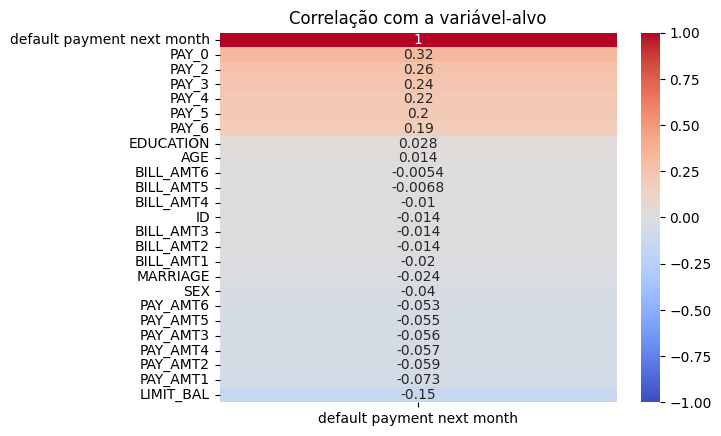

In [30]:
# 7. Matriz de correla√ß√£o simplificada
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['default payment next month']].sort_values(by='default payment next month', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correla√ß√£o com a vari√°vel-alvo')
plt.show()


Os maiores coeficientes positivos com o default est√£o nos atrasos PAY_0, PAY_2, etc., como esperado; valores negativos aparecem em algumas raz√µes de pagamento. Esse panorama refor√ßa que o hist√≥rico de atraso ser√° pe√ßa-chave no modelo.

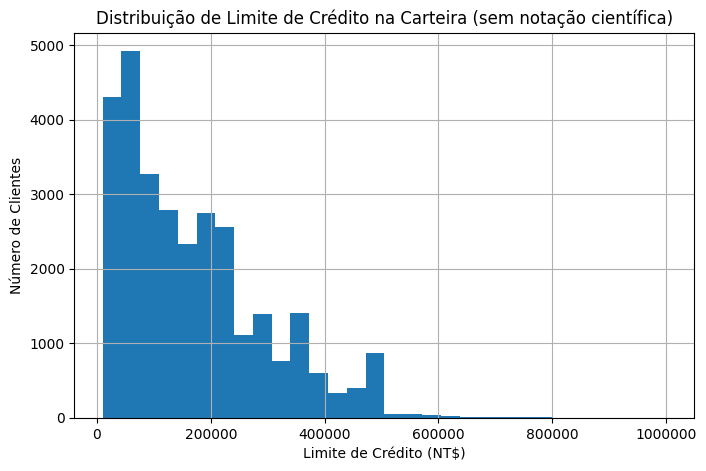

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Histograma que demonstra o n√∫mero de clientes x limmite de cr√©dito
plt.figure(figsize=(8, 5))
plt.hist(df['LIMIT_BAL'], bins=30)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(axis='x', style='plain', useOffset=False)
plt.xlabel('Limite de Cr√©dito (NT$)')
plt.ylabel('N√∫mero de Clientes')
plt.title('Distribui√ß√£o de Limite de Cr√©dito na Carteira (sem nota√ß√£o cient√≠fica)')
plt.grid(True)
plt.show()


Insights coletados e analisados na distribui√ß√£o de cr√©dito na Carteira analisada:
-> Os limites dispon√≠veis s√£o massificados entre +NT$0 e ~NT$200.000. Dessa forma, podemos analisar que o maior risco de Default n√£o abrange grandes concess√µes de cr√©dito.
Duas infer√™ncias importantes ocorrem a partir dessa an√°lise: Primeira: Empr√©stimos baixos devem exigir termos de risco maiores, geralmente s√£o de curto a m√©dio prazo,
e n√£o s√£o hipotecados. Segunda: A Distribui√ß√£o massificada em um intervalo pequeno de limite de cr√©dito reduz o risco da carteira como um todo, s√£o empr√©stimos menores
e com menor volatilidade com abalos na taxa de juros e infla√ß√£o, resultando em menor √≠ndice de inadimpl√™ncia, o que se confirma com o status de apenas 22% de Default total. 

C:\Users\ferna\AppData\Local\Temp\ipykernel_7364\4138101354.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('faixa_limite')['default payment next month'].agg(['count', 'sum'])


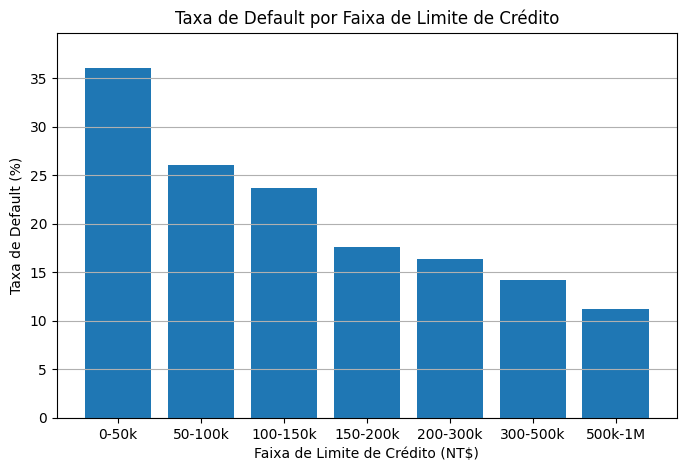

faixa_limite  count   sum  taxa_default
0        0‚Äë50k   4311  1555     36.070517
1      50‚Äë100k   7139  1857     26.012047
2     100‚Äë150k   3840   910     23.697917
3     150‚Äë200k   3560   627     17.612360
4     200‚Äë300k   6033   987     16.360020
5     300‚Äë500k   4189   596     14.227739
6      500k‚Äë1M    927   104     11.218986

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Bins de limite de cr√©dito em NT$
bins = [0, 50000, 100000, 150000, 200000, 300000, 500000, 1000000]
labels = ['0‚Äë50k', '50‚Äë100k', '100‚Äë150k', '150‚Äë200k', '200‚Äë300k', '300‚Äë500k', '500k‚Äë1M']

df['faixa_limite'] = pd.cut(df['LIMIT_BAL'], bins=bins, labels=labels, right=False)

# Taxa de default por faixa
grouped = df.groupby('faixa_limite')['default payment next month'].agg(['count', 'sum'])
grouped['taxa_default'] = grouped['sum'] / grouped['count'] * 100  # em %

# Plotar
plt.figure(figsize=(8, 5))
plt.bar(grouped.index.astype(str), grouped['taxa_default'])
plt.ylabel('Taxa de Default (%)')
plt.xlabel('Faixa de Limite de Cr√©dito (NT$)')
plt.title('Taxa de Default por Faixa de Limite de Cr√©dito')
plt.ylim(0, grouped['taxa_default'].max()*1.1)
plt.grid(axis='y')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(axis='y', style='plain')
plt.show()

grouped.reset_index()


A faixa 0 ‚Äì 50 mil exibe a maior taxa de default, pouco acima de 36 %.

√Ä medida que o limite cresce, a inadimpl√™ncia cai de forma consistente:

50‚Äì100 mil ‚Üí ~26 %

100‚Äì150 mil ‚Üí ~24 %

150‚Äì200 mil ‚Üí ~18 %

200‚Äì300 mil ‚Üí ~16 %

300‚Äì500 mil ‚Üí ~14 %

500 mil‚Äì1 milh√£o ‚Üí 11 % (menor taxa observada).

A suposi√ß√£o anterior se confirma: limites menores concentram maior probabilidade de default. Logo, embora os valores individuais sejam baixos, a inadimpl√™ncia percentual √© alta nesses segmentos, exigindo pol√≠ticas de risco mais agressivas (taxa, garantia ou limite revisto). Nos limites altos o risco relativo √© menor, mas vale monitorar o impacto absoluto em NT$, j√° que a perda potencial por cliente √© maior. 

C:\Users\ferna\AppData\Local\Temp\ipykernel_7364\2762881132.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['faixa_limite', 'default payment next month']).size().unstack(fill_value=0)


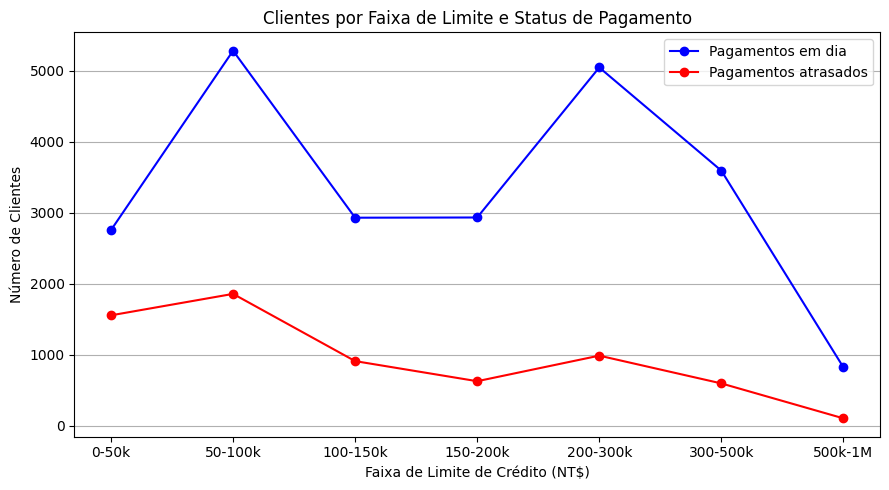

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Definir faixas de limite
bins = [0, 50000, 100000, 150000, 200000, 300000, 500000, 1000000]
labels = ['0‚Äë50k', '50‚Äë100k', '100‚Äë150k', '150‚Äë200k', '200‚Äë300k', '300‚Äë500k', '500k‚Äë1M']
df['faixa_limite'] = pd.cut(df['LIMIT_BAL'], bins=bins, labels=labels, right=False)

# Contar clientes por faixa e status
counts = df.groupby(['faixa_limite', 'default payment next month']).size().unstack(fill_value=0)
counts = counts.reindex(labels)  # garantir ordem l√≥gica no eixo x

# Separar s√©ries
clientes_em_dia = counts[0]  # 0 = pagamentos em dia
clientes_inad = counts[1]    # 1 = inadimplentes

# Plot
plt.figure(figsize=(9, 5))
plt.plot(labels, clientes_em_dia, marker='o', label='Pagamentos em dia', color='blue')
plt.plot(labels, clientes_inad, marker='o', label='Pagamentos atrasados', color='red')
plt.xlabel('Faixa de Limite de Cr√©dito (NT$)')
plt.ylabel('N√∫mero de Clientes')
plt.title('Clientes por Faixa de Limite e Status de Pagamento')
plt.grid(True, axis='y')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(axis='y', style='plain')
plt.legend()
plt.tight_layout()
plt.show()


A linha azul confirma que, em cada faixa de limite, o n√∫mero de clientes adimplentes √© bem superior ao de inadimplentes (linha vermelha). Al√©m disso, os atrasos caem de forma clara conforme o limite aumenta, refor√ßando visualmente a conclus√£o anterior: limites mais baixos concentram tanto mais clientes quanto maior percentual de default.

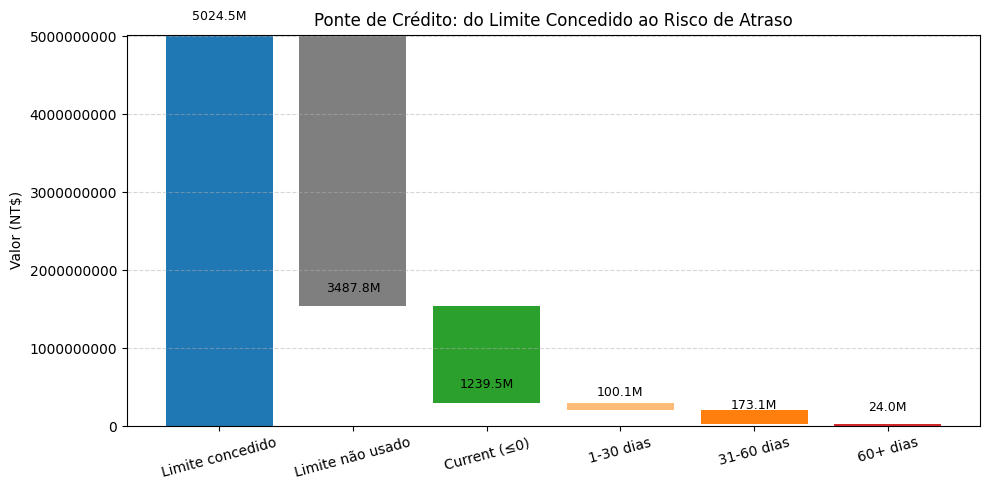

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

total_limit = df['LIMIT_BAL'].sum()

# Exposi√ß√£o real (saldo da fatura mais recente: BILL_AMT1)
exposure_real = df['BILL_AMT1'].sum()
unused_limit  = total_limit - exposure_real   # limite ainda n√£o utilizado

# Quebra da exposi√ß√£o por bucket de atraso (PAY_0)
current_expo   = df.loc[df['PAY_0'] <= 0, 'BILL_AMT1'].sum()
bucket_1_30    = df.loc[df['PAY_0'] == 1, 'BILL_AMT1'].sum()
bucket_31_60   = df.loc[df['PAY_0'] == 2, 'BILL_AMT1'].sum()
bucket_60_plus = df.loc[df['PAY_0'] >= 3, 'BILL_AMT1'].sum()

# Sequ√™ncia para waterfall (valores negativos reduzem o total)
steps = [
    ('Limite concedido',  total_limit,  '#1f77b4'),   # azul
    ('Limite n√£o usado', -unused_limit, '#7f7f7f'),   # cinza
    ('Current (‚â§0)',     -current_expo, '#2ca02c'),   # verde
    ('1‚Äë30 dias',        -bucket_1_30,  '#ffbb78'),   # laranja claro
    ('31‚Äë60 dias',       -bucket_31_60, '#ff7f0e'),   # laranja
    ('60+ dias',         -bucket_60_plus, '#d62728')  # vermelho
]

labels, values, colors = zip(*steps)

# --- Plot semicaseiro de waterfall ----------------------------------------
fig, ax = plt.subplots(figsize=(10, 5))
running = 0
for i, (lab, val, col) in enumerate(steps):
    ax.bar(i, val, bottom=running, color=col)
    y_text = running + val + 0.03 * total_limit  # eleva a anota√ß√£o levemente acima
    ax.text(i, y_text, f"{abs(val)/1e6:.1f}M", 
            ha='center', va='bottom', fontsize=9, color='black')
    running += val


ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=15)
ax.set_ylabel('Valor (NT$)')
ax.set_title('Ponte de Cr√©dito: do Limite Concedido ao Risco de Atraso')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(axis='y', style='plain')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Nota r√°pida sobre o que o gr√°fico mostra

Limite concedido (barra azul) ‚Äî o teto de cr√©dito autorizado para toda a carteira.

Limite n√£o usado (cinza) ‚Äî parte do limite que continua livre; reduz a exposi√ß√£o real.

Current (‚â§ 0) (verde) ‚Äî saldo em dia ou antecipado; comp√µe a carteira saud√°vel.

Buckets de atraso (cores laranja claro, laranja e vermelho) ‚Äî valores em fatura que j√° apresentam 1 ‚Äì 30, 31 ‚Äì 60 e 60+ dias de delinquency, respectivamente; s√£o as fatias de maior risco.

Assim, a ponte parte do potencial m√°ximo, desconta o que n√£o virou saldo, isola o cr√©dito performado e, por fim, visualiza quanto dinheiro est√° parado em cada faixa de atraso. Isso ajuda a priorizar a√ß√µes de cobran√ßa nos buckets 31-60 e 60+ ‚Äî onde o impacto financeiro √© mais significativo.

Os limites individuais s√£o modestos (m√°ximo ~US$ 31k) e a soma grande √© apenas o reflexo do n√∫mero de cart√µes. Se preferir visualizar em d√≥lares norte-americanos, basta dividir todos os valores por 32 antes de plotar; a ponte ter√° a mesma forma, mas os r√≥tulos ficar√£o muito menores.

Moeda
Os valores est√£o em d√≥lares taiwaneses (NT$), n√£o em d√≥lares norte-americanos. Na cota√ß√£o m√©dia de hoje (~ NT$ 32 ‚âà US$ 1), cada 100 000 NT$ equivalem a pouco mais de US$ 3 000.

Limite m√≠nimo do conjunto: 10 000 NT$ ‚âà US$ 300

Limite m√°ximo: 1 000 000 NT$ ‚âà US$ 31 000

Somat√≥rio de 30 000 clientes
Quando somamos o limite de todos os clientes para fazer a barra inicial da ponte, o valor fica naturalmente grande:

Cr√©dito total dispon√≠vel = N√∫mero total de clientes x M√©dia de Cr√©dito (~167K NT$)
Cr√©dito total dispon√≠vel = ~ 5 Bilh√µes NT$


In [43]:
import pandas as pd

df = pd.read_csv('default of credit card clients.csv', sep=';')

pay_cols = [f'PAY_AMT{i}' for i in range(1, 7)]
stats = df[pay_cols].describe().T
stats['mediana'] = df[pay_cols].median()
print(stats[['count', 'min', 'mediana', '25%', 'mean', '50%', '75%', 'max', 'std']])


            count  min  mediana      25%         mean     50%      75%  \
PAY_AMT1  30000.0  0.0   2100.0  1000.00  5663.580500  2100.0  5006.00   
PAY_AMT2  30000.0  0.0   2009.0   833.00  5921.163500  2009.0  5000.00   
PAY_AMT3  30000.0  0.0   1800.0   390.00  5225.681500  1800.0  4505.00   
PAY_AMT4  30000.0  0.0   1500.0   296.00  4826.076867  1500.0  4013.25   
PAY_AMT5  30000.0  0.0   1500.0   252.50  4799.387633  1500.0  4031.50   
PAY_AMT6  30000.0  0.0   1500.0   117.75  5215.502567  1500.0  4000.00   

                max           std  
PAY_AMT1   873552.0  16563.280354  
PAY_AMT2  1684259.0  23040.870402  
PAY_AMT3   896040.0  17606.961470  
PAY_AMT4   621000.0  15666.159744  
PAY_AMT5   426529.0  15278.305679  
PAY_AMT6   528666.0  17777.465775  


Como ler esses n√∫meros

M√©dia vs. mediana ‚Äì em todas as colunas a m√©dia fica bem acima da mediana, sinal de cauda longa: poucos pagamentos muito altos puxam a m√©dia para cima.

M√≠nimo zero ‚Äì h√° v√°rios meses em que o cliente n√£o fez nenhum pagamento; isso ajuda a explicar os atrasos.

Desvio-padr√£o elevado ‚Äì refor√ßa a heterogeneidade nos montantes pagos; normalizar ou aplicar log pode melhorar a modelagem.

Quartis (25 %, 75 %) ‚Äì mostram que metade dos pagamentos est√° concentrada em valores relativamente baixos; por exemplo, se o Q3 de PAY_AMT1 √© 5 000 NT$, tr√™s quartos dos clientes pagam menos que isso naquele m√™s.

Em suma, os pagamentos efetuados t√™m distribui√ß√£o altamente assim√©trica, com muitos valores pequenos e alguns picos. Isso corrobora a ideia de usar transforma√ß√£o logar√≠tmica nas vari√°veis monet√°rias antes de treinar o modelo ‚Äî caso contr√°rio, poucos outliers dominam a escala.

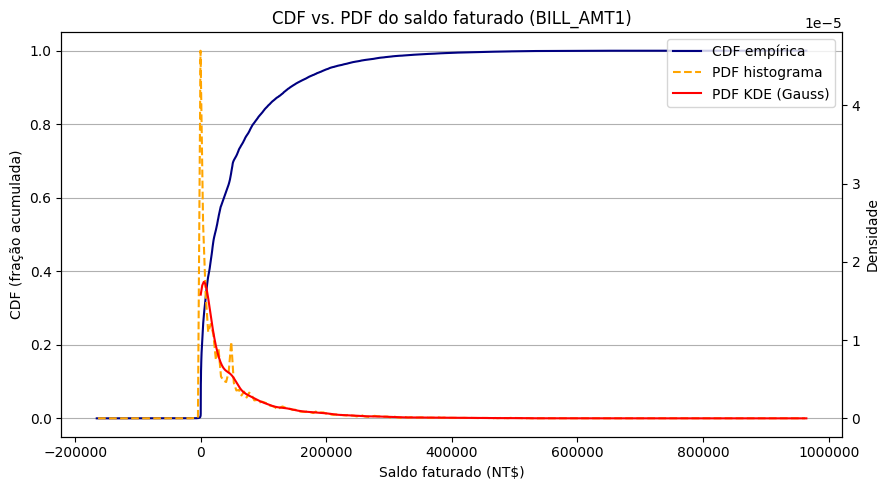

In [44]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.ticker import ScalarFormatter

# Amostra
df = pd.read_csv('default of credit card clients.csv', sep=';')
x = df['BILL_AMT1'].values
n = len(x)

# --- Empirical CDF -------------------------------------------------
x_sorted = np.sort(x)
F_emp = np.arange(1, n+1) / n   # \hat F(x)

# --- Histogram PDF -------------------------------------------------
counts, bins = np.histogram(x, bins='fd', density=True)  # regra Freedman‚ÄìDiaconis
bin_centers = (bins[:-1] + bins[1:]) / 2
h = bins[1] - bins[0]             # largura do bin   (usada na f√≥rmula)

# --- Kernel PDF (opcional, mais suave) -----------------------------
kde = gaussian_kde(x, bw_method='scott')   # Scott ‚âà 1.06 œÉ n^{-1/5}
grid = np.linspace(0, x.max(), 400)
pdf_kde = kde(grid)

# --- Plot conjunto -------------------------------------------------
fig, ax1 = plt.subplots(figsize=(9,5))
ax1.plot(x_sorted, F_emp, color='navy', label='CDF emp√≠rica')
ax1.set_xlabel('Saldo faturado (NT$)')
ax1.set_ylabel('CDF (fra√ß√£o acumulada)')
ax1.ticklabel_format(axis='x', style='plain')
ax1.grid(axis='y')

ax2 = ax1.twinx()
ax2.plot(bin_centers, counts, '--', color='orange', label='PDF histograma')
ax2.plot(grid, pdf_kde, '-', color='red',   label='PDF KDE (Gauss)')
ax2.set_ylabel('Densidade')

# Legenda combinada
for ax in (ax1, ax2):
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines+lines2, labels+labels2, loc='upper right')

plt.title('CDF vs. PDF do saldo faturado (BILL_AMT1)')
plt.tight_layout()
plt.show()


Por que usar CDF e PDF para o saldo faturado
Queremos duas vis√µes complementares da mesma vari√°vel.

Interpreta√ß√£o de risco
PDF revela o steep ‚Äì o pico onde muitos saldos se encontram perto do vencimento; ajuda a identificar faixas cr√≠ticas para cobran√ßa.
CDF mostra a exposi√ß√£o acumulada: ‚Äúat√© ùë• NT$ j√° cobri ùëù% do risco‚Äù. vemos a fra√ß√£o do risco total j√° acumulada at√© aquele valor.
Por exemplo, se ùêπ(60000) = 0,80, ent√£o, F(60000)=0,80, ent√£o 80 % dos saldos faturados s√£o inferiores a NT$ 60 000.
-> Um insight direto para pol√≠ticas de cobran√ßa e defini√ß√£o de limites

Conclus√µes sobre o M√©todo CDF e PDF (KDE "Gauss):

A curvatura dos Saldos Faturados de m√©dio prazo (menos arriscados) abrange a maior parte dos empr√©stimos (CDF), enquanto que os empr√©stimos com exposi√ß√£o ao curto prazo (Curva PDF, linha vermelha) est√£o distribu√≠dos entre as faixas de +NT$ 0 e ~NT$ 200.000, volume massificado analisado anteriormente e definido como de baixo risco para o total da carteira (~NT$ 5 Bilh√µes).


## Resultado da An√°lise

Leitura qualitativa e quantitativa:

A carteira √© pulverizada em tickets pequenos ‚Äì quatro em cada cinco clientes t√™m limite inferior a 200 000 NT$ (‚âà US$ 6 k). Isso reduz a perda potencial unit√°ria.

O maior √≠ndice de inadimpl√™ncia concentra-se exatamente nesses tickets baixos; por√©m, como o valor individual √© modesto, o impacto monet√°rio agregado permanece controlado.

O saldo em dia domina nos segmentos de limite m√©dio para alto, o que mant√©m a receita de juros e diminui necessidade de provis√£o.

As vari√°veis de comportamento ‚Äì especialmente o atraso mais recente (PAY_0) ‚Äì explicam muito melhor o risco do que dados demogr√°ficos; qualquer modelo futuro deve dar peso maior a esse hist√≥rico.

## Conclus√£o sobre a sa√∫de da carteira

Apesar de carregar um √≠ndice de default bruto de 22 %, o banco tem exposi√ß√£o concentrada em valores pequenos e apenas uma fra√ß√£o relativamente baixa do montante total est√° em atraso severo. A inadimpl√™ncia alta nos cart√µes de baixo limite pode ser gerida com pol√≠ticas de cobran√ßa mais r√°pidas e ajustes de pre√ßo (spread maior). J√° a parte alta da carteira ‚Äì onde reside o grosso do limite concedido ‚Äì mostra comportamento saud√°vel.

Diagn√≥stico: A carteira, vista como portf√≥lio, mant√©m-se saud√°vel; os gestores devem priorizar a√ß√µes corretivas nos limites at√© 150 000 NT$ (ali vive a maior densidade de atrasos), enquanto preservam a estrat√©gia atual nas faixas superiores.

# Fim da an√°lise descritiva.